In [1]:
%pip install graphviz -q

Note: you may need to restart the kernel to use updated packages.


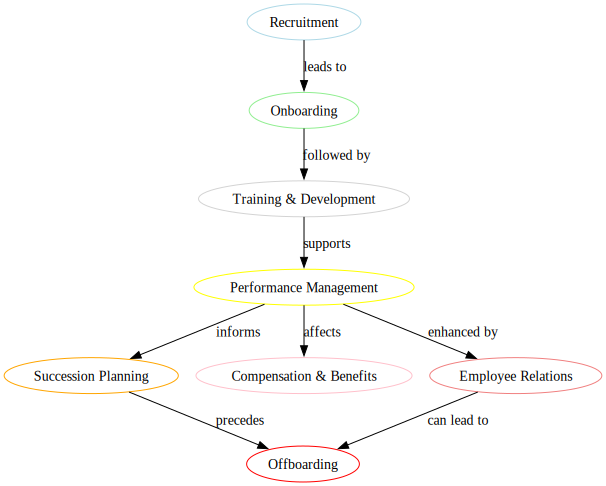

I've created a visual representation of HR processes to help you understand the flow and relationships between different activities within HR. This includes:

- **Recruitment**, leading to
- **Onboarding**, followed by
- **Training & Development**, which supports
- **Performance Management**. This, in turn, informs
- **Succession Planning**, affects
- **Compensation & Benefits**, and is enhanced by
- **Employee Relations**, which can lead to
- **Offboarding**.

This visual should give you a clear overview of how HR processes interlink and flow from one to the next.

In [2]:
import warnings
from graphviz import Digraph
from pydantic import BaseModel, Field
from typing import List
from chatlab import Chat, system
from chatlab.decorators import incremental_display

class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = Field("black", description="A valid Graphviz color name or hex code.")

class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(..., default_factory=list)
    edges: List[Edge] = Field(..., default_factory=list)


def visualize_knowledge_graph(kg: KnowledgeGraph, comment: str = "Knowledge Graph"):
    """Visualizes a knowledge graph using graphviz."""
    if kg is None:
        return

    dot = Digraph(comment=comment)

    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    return dot


@incremental_display(visualize_knowledge_graph)
def store_knowledge_graph(kg: KnowledgeGraph, comment: str):
    """Creates a graphviz diagram for the user and stores it in their database."""
    return "Stored graph, visual shown"

chat = Chat(
    system("You are a helpful assistant that can create knowledge graphs and store them in a database. You only respond with the knowledge graph."),
    model="gpt-4-turbo-preview",
    chat_functions=[store_knowledge_graph],
)

await chat("Visually teach me about HR processes", temperature=0.7)

In [3]:
await chat("Who are the founders?")

It seems like there might be a misunderstanding. Could you please specify the company or organization you're asking about the founders of?

In [4]:
display("above here", update=True, display_id="230945832")



<DisplayHandle display_id=230945832>

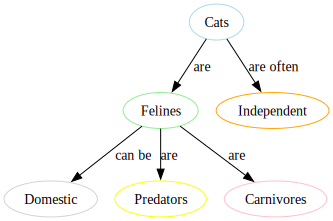

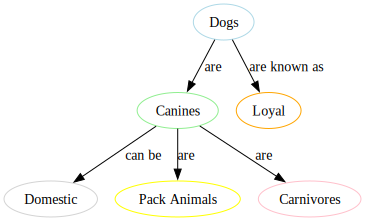

I've created two knowledge graphs for you:

1. **About Cats**: This graph explores the characteristics of cats, highlighting their nature as felines, domestic animals, predators, independent beings, and carnivores.

2. **About Dogs**: This graph delves into the world of dogs, showcasing their identity as canines, domestic animals, pack animals, known for their loyalty, and as carnivores.

Both visuals should give you a clear overview of the unique attributes and classifications of cats and dogs.

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    await chat("Ok now make two knowledge graphs. One about cats and one about dogs.")